<a href="https://colab.research.google.com/github/yasminenavishaa/Machine-Learning/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kuis 2 Pembelajaran Mesin**


### **Kelompok 6**

* Clarita Putri Anggraeni 				(2141720213)
* Muhammad Bintang Sholu Firmansyah		(2141720101)
* Syahla’ Syafiqah Fayra 				(2141720015)
* Yasmine Navisha Andhani				(2141720047)


---
## **Soal**

**Buat program OCR untuk mengextract text dari data ktp, dengan input foto ktp dan output text**

****
###  **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  **Download Library**

* OpenCV
* Pytesseract
* matplotlib
* tesseract-ocr
* tesseract-ocr-ind

In [ ]:
# Install library tesseract-ocr dan pytesseract, opencv-python
# Perintah di bawah ini menginstal Tesseract OCR, sebuah perangkat lunak pengenalan teks open-source.
# Pytesseract adalah wrapper Python untuk Tesseract OCR yang memungkinkan penggunaan Tesseract OCR dengan Python.

# Download library
!pip install opencv-python
!pip install pytesseract
!pip install matplotlib
!sudo apt-get install tesseract-ocr
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (464 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: R

###  **Import Library**

In [ ]:
# Import Library
import cv2 # Library OpenCV untuk pemrosesan citra
import pytesseract # Wrapper Python untuk Tesseract OCR
import os
import numpy as np # Library untuk operasi matematika menggunakan array
from matplotlib import pyplot as plt # Library untuk visualisasi data


###  **Inisiasi Path Folder**

In [ ]:
# Path folder
folder_path = '/content/drive/MyDrive/Machine Learning/dataset_KTP/'

###  **Preprocessing Data Image**

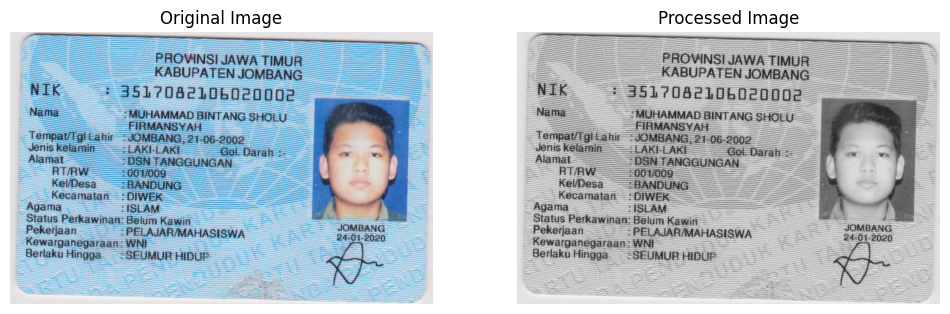

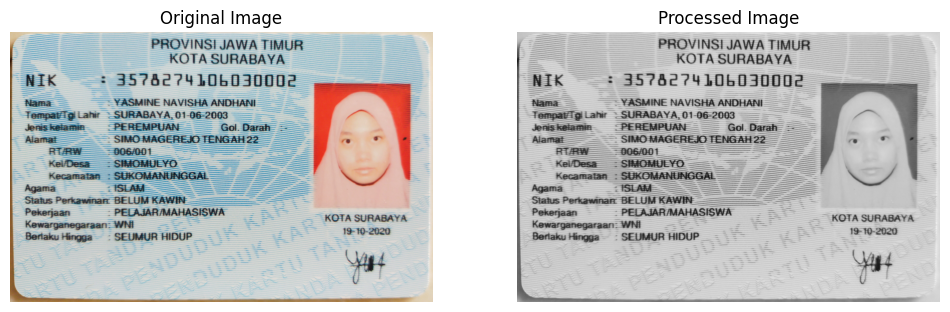

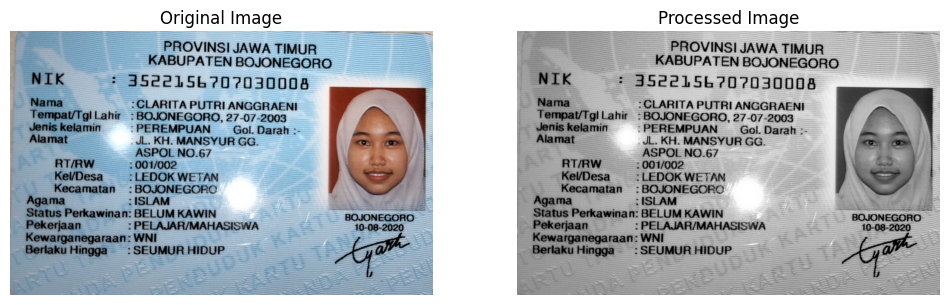

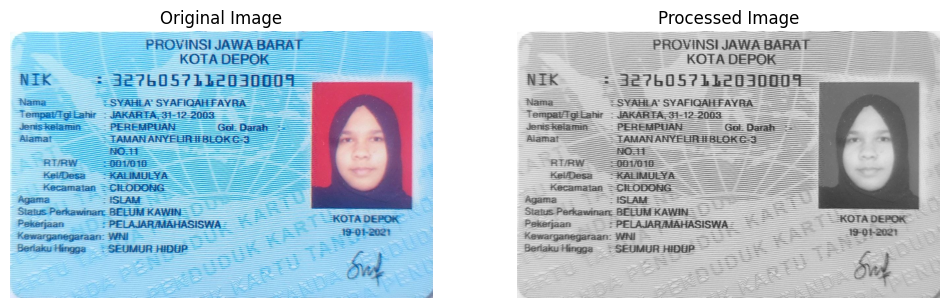

In [ ]:
# Preprocessing image
def preprocess_image(image_path):
    # Load image using OpenCV
    imgPreprocess = cv2.imread(image_path)

    # Grayscale
    gray = cv2.cvtColor(imgPreprocess, cv2.COLOR_BGR2GRAY)

    return gray

# Process all images in the folder and display them
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)

        # Load the image
        original_image = cv2.imread(image_path)

        # Apply preprocessing steps
        processed_image = preprocess_image(image_path)

        # Display the original and processed images
        plt.figure(figsize=(12, 6))

        # Plot original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Plot processed image
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
        plt.title('Processed Image')
        plt.axis('off')

        plt.show()

Penjelasan :

Kode tersebut digunakan untuk memproses dan menampilkan gambar identifikasi KTP. Awalnya, path file gambar KTP ditentukan dalam variabel `image_path`. Fungsi `preprocess_image(image_path)` kemudian digunakan untuk melakukan pra-pemrosesan gambar, termasuk pengubahan ke citra skala keabuan, dan penerapan metode Preprocessing image grayscale. Setelah itu, gambar asli dan hasil pra-pemrosesan ditampilkan secara bersamaan untuk melihat perbedaan antara gambar asli dan gambar yang telah diproses dalam konteks identifikasi KTP.

###  **Bounding Box Tiap Dokumen**

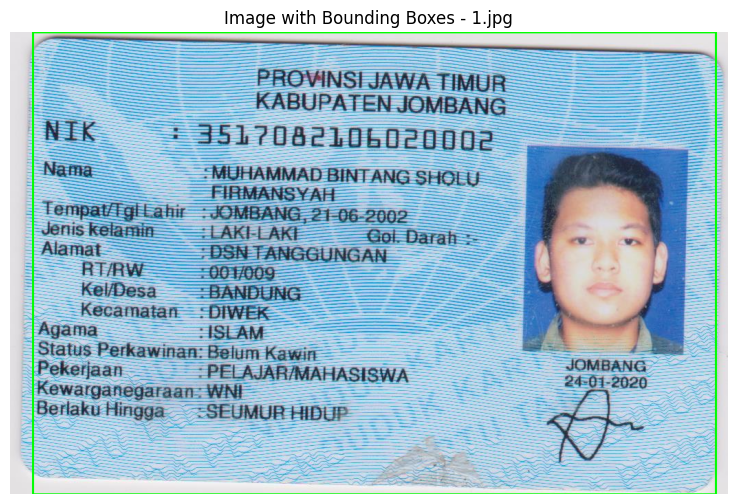

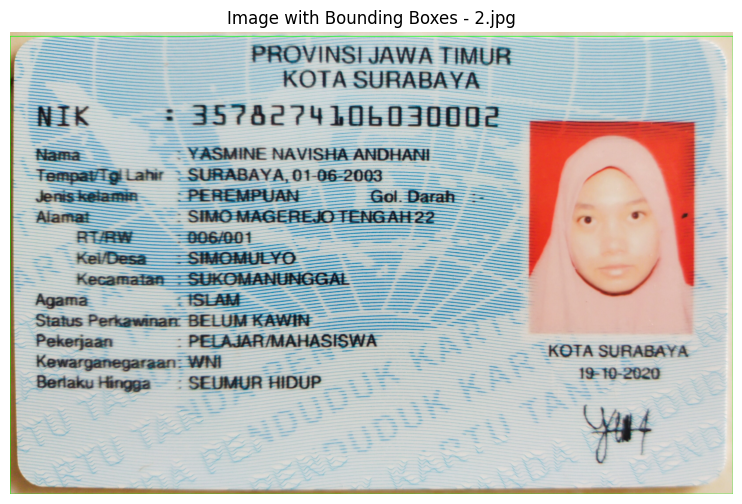

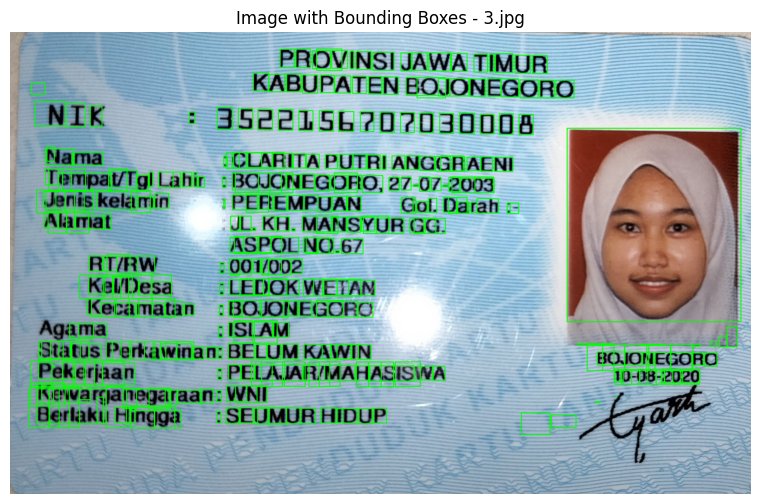

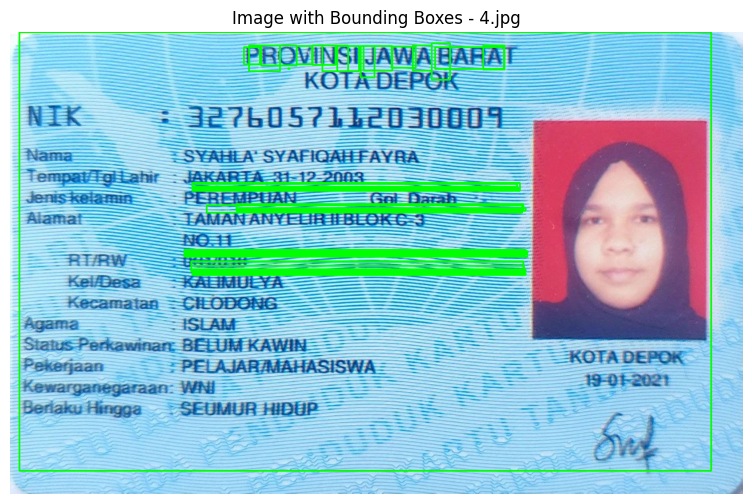

In [ ]:
# Bounding box function
def apply_bounding_box(image):
    # Get dimensions of the image
    h, w = image.shape[:2]

    # Get bounding boxes using pytesseract.image_to_boxes()
    boxes = pytesseract.image_to_boxes(image)

    # Draw bounding boxes on the image
    for b in boxes.splitlines():
        b = b.split(' ')
        image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

    return image

# Process all images in the folder and display them with bounding boxes
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)

        # Load the original image
        original_image = cv2.imread(image_path)

        # Convert BGR to RGB
        rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Apply bounding box
        image_with_boxes = apply_bounding_box(rgb_image)

        # Display the image with bounding boxes
        plt.figure(figsize=(12, 6))
        plt.imshow(image_with_boxes)
        plt.title(f'Image with Bounding Boxes - {filename}')
        plt.axis('off')
        plt.show()

Penjelasan :

Kode di atas digunakan dengan tujuan mengidentifikasi dan menampilkan bounding box (kotak pembatas) untuk setiap kata pada suatu dokumen gambar, khususnya contoh dokumen KTP. Proses dimulai dengan membaca gambar dari direktori menggunakan OpenCV, diikuti dengan pengambilan dimensi tinggi, lebar, dan channel warna gambar. Metode `pytesseract.image_to_boxes()` digunakan untuk mendapatkan informasi bounding box untuk setiap karakter teks pada gambar, yang selanjutnya diiterasi dan kotak karakternya mengidentifikasi gambar asli menggunakan OpenCV. Warna kotak ditentukan sebagai hijau dengan ketebalan garis sebesar 2 piksel. Akhirnya, gambar dengan bounding box ditampilkan dengan menggunakan matplotlib, memungkinkan visualisasi yang jelas terhadap letak kata-kata pada dokumen gambar KTP.

###  **Plot show KTP dan hasil OCR setiap KTP**

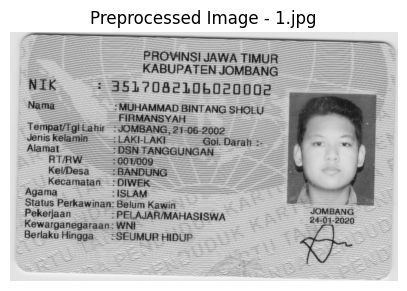

--------------------------------------------------
OCR Result for 1.jpg:
 

PROVINSI JAWA TIMUR

KABUPATEN JOMBANG
NIK : 351?08210k4020002
Nama : MUHAMMAD BINTANG SHOLU
FIRMANSYAH
Tempat/Tgi Lahir ! JOMBANG, 21-06-2002
Jenis kelamin 2LAKI-L AKI Got Darah :-
Alamat ' BSN TANGGUNGAN
RT/RW 1007009

Kel/Desa : BANDUNG
Kecamatan: DIWEK

   

Agama LISLAM - 25
Status Perkawinan: Belum Kawin JOMBANG
Pekerjaan : PELAJAR/MAHASISWA 24-01-2020
Kewarganegaraan: WNI L£

Berlaku Hingga: SEUMUR HIDUP

--------------------------------------------------


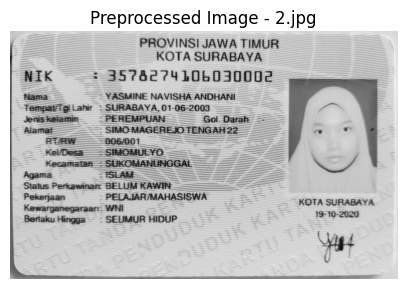

--------------------------------------------------
OCR Result for 2.jpg:
PROVINSI JAWA TIMUR
KOTA SURABAYA

3578274105030002 ——

ANN hn smua mama La

NIK :

Keras YASMINE NAVISHA ANDHANI
Temparig ah SURABAYA, 01-96-2003

l

|

TAI

-
.

MN Yi

"kkal ata ta tu

 

Status Perkawinan BELUM KAMI — ES
Kewarganegaraan: WNI A SURAB
Beriaku Hingga SEUMUR HIDUP »

N 7 d

--------------------------------------------------


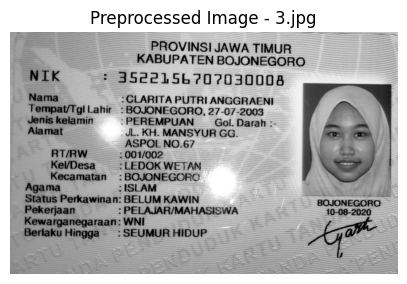

--------------------------------------------------
OCR Result for 3.jpg:
NIK :

Nama
Tempat/Tgi Lahir
Jenis kelamin

3500156?0”030002

PROVINSI JAWA TIMUR
KABUPATEN BOJONEGORO

:CLARITA PUTRI ANGGRAENI
: BOJONEGORO, 27-07-2003
PEREMPUAN Gol. Darah :-

 

Alamat JL. KH. MANSYUR GG.
ASPOL NO.67

RT/RW : 001/002

Kel/Desa : LEDOK WETAM

Kecamatan : BOJONEGORO
Agama : ISLAM
Status Perkawinan: BELUM KAWIN BOJONEGORO
Pekerjaan : PELAJAR/MAHASISWA 10-08-2020

Kewarganegaraan: WNI

Berlaku Hingga

: SEUMUR HIDUP

--------------------------------------------------


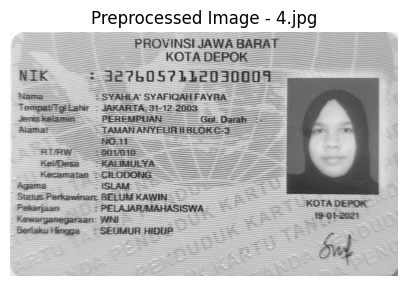

--------------------------------------------------
OCR Result for 4.jpg:
PROVINSI JAWA BARAT
KOTA DEPOK

NIK ' 3275057112030004 AA

   

 

Agam ' "
Siaius Perkawinan BELUM KAWIN Tn 0 R5 1 PN
na PELAJAR MAHASISWA. Bet 5 KOTA DEROK
. 1 " Na 92021
“e janegaraan WNI - 25

Denaru Hingga SEUMUR HIDUP - T 1 1 - ,

Dag
TE

--------------------------------------------------


In [ ]:
# Process all images in the folder and perform OCR
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)

        # Load the preprocessed image
        preprocessed_image = preprocess_image(image_path)

        # Display the preprocessed image
        plt.figure(figsize=(5, 5))
        plt.imshow(preprocessed_image, cmap='gray')
        plt.title(f'Preprocessed Image - {filename}')
        plt.axis('off')
        plt.show()

        # Perform thresholding on the grayscale image
        th, threshed = cv2.threshold(preprocessed_image, 127, 255, cv2.THRESH_TRUNC)

        # OCR to string
        result = pytesseract.image_to_string(threshed, lang='ind')

        # Display the OCR result with separators
        print('-' * 50)
        print(f'OCR Result for {filename}:')
        print(result)
        print('-' * 50)

Penjelasan :

Kode di atas menggunakan library pytesseract untuk melakukan ekstraksi teks dari suatu gambar yang telah diproses sebelumnya. `pytesseract.image_to_string()` digunakan untuk mentransformasi citra yang disimpan dalam variabel threshed menjadi teks. Parameter lang='ind' menunjukkan bahwa bahasa yang digunakan dalam teks adalah bahasa Indonesia. Hasil ekstraksi teks ini kemudian disimpan dalam variabel result untuk digunakan atau ditampilkan lebih lanjut dalam program.

Setelah Kode mengekstraksi teks dari gambar KTP. Kode ini melakukan konversi gambar ke citra skala keabuan, menampilkan citra tersebut, melakukan thresholding, dan terakhir, mengekstraksi teks menggunakan pytesseract. Hasil ekstraksi teks disimpan dalam variabel `result`.
